In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def setup_matplotlib_environment():
        # If I decide to generate n colours using a built in colourmap instead.
        # self.colour_generator = color=cm.rainbow(np.linspace(0,1,self.max_num_colours))

        plt.rc('lines', linewidth=4)
        # plt.rc('axes', prop_cycle=(plt.cycler('linestyle', ['-', '--', ':', '-.'])))

        # Font
        plt.rcParams['text.usetex'] = False
        plt.rcParams['font.size'] = 18
        plt.rcParams['legend.fontsize'] = 18

        # Ticks
        plt.rcParams['xtick.direction'] = 'in'
        plt.rcParams['ytick.direction'] = 'in'
        plt.rcParams['xtick.major.size'] = 5.0
        plt.rcParams['xtick.minor.size'] = 3.0
        plt.rcParams['ytick.major.size'] = 5.0
        plt.rcParams['ytick.minor.size'] = 3.0

        # Line width
        plt.rcParams['xtick.major.width'] = 3.0
        plt.rcParams['xtick.minor.width'] = 3.0
        plt.rcParams['ytick.major.width'] = 3.0
        plt.rcParams['ytick.minor.width'] = 3.0
        plt.rcParams['axes.linewidth'] = 3.0

        # Marker Size
        plt.rcParams['lines.markersize'] = 7
        plt.rcParams['lines.markeredgewidth'] = 2.0

        # Legend
        plt.rcParams['legend.handlelength'] = 3.0

setup_matplotlib_environment()

In [50]:
class Data_Reader_Plotter:
    
    def __init__(self, root, filenames, names):
        self.root = root
        self.filenames = filenames
        self.names = names
        
        # Blue colours
        self.colours_blue = ['#67119c',
                             '#3F00FF', 
                             '#6082B6',  
                             '#CCCCFF', 
                             #'#0818A8',
                             #'#50C878',
                             '#00A36C',
                             #'#808000',
                             '#93C572',
                             '#00FF7F',
                             '#119a9c',
                             '#119c5b',
                             #'#399c11',
                             '#9c9111']
        
        self.markers = ['x', 'v', '^', 's', '+', 'd', '2', '*', 'p']
    
    def read_rdfs(self):
        self.rdf_data = {}
        
        for fn in self.filenames:
            self.rdf_data[fn] = np.genfromtxt(os.path.join(self.root, fn, "Analysis_RDF_Data.txt"))
            
    def plot_rdfs(self):
        fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
        
        for i, fn in enumerate(self.filenames):
            r = self.rdf_data[fn][:, 0]
            rdf = self.rdf_data[fn][:, 1]
            
            ax.plot(r, rdf, 
                    color=self.colours_blue[i], 
                    # marker=self.markers[i],
                    label=self.names[i])
        
        ax.hlines(1, xmin=0, xmax=10, linestyle='dashed', color='k')
        ax.set_xlim(0, 10)
        ax.set_ylim(0)
        ax.set_ylabel("RDF")
        ax.set_xlabel("R [$\mathrm{\AA}$]")
        ax.set_title("Radial Distribution Function")
        # ax.legend(frameon=False)
        ax.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.,
                 frameon=False)
        
        plt.savefig("Radial_Distribution_Functions.png", format='png', dpi=200, bbox_inches='tight')
        
    def read_coord_fractions(self):
        self.coord_fractions = {}
        
        for fn in self.filenames:
            # Modify to average last couple of columns?
            self.coord_fractions[fn] = np.genfromtxt(os.path.join(self.root, fn, "Analysis_Coordination_Fractions_Data.txt"))
            
    def plot_coord_fractions(self):
        fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
        coord_nums = [1, 2, 3, 4]#, 5]
        coordinations = {}
        
        for i, num in enumerate(coord_nums):
            coordinations[num] = []
            for fn in self.filenames:
                coordinations[num].append(np.average(self.coord_fractions[fn][i, 1:5]))
                
        for i, num in enumerate(coord_nums):
            x = range(len(self.filenames))
            
            coord = coordinations[num]
            
            ax.plot(x, coord, 
                    color=self.colours_blue[i], 
                    marker=self.markers[i],
                    label=str(coord_nums[i]))
        
        ax.set_ylim(0, 100)
        ax.set_xticks(x)
        ax.set_xticklabels(self.names, rotation=45)
        ax.set_title("Coordination Fractions")
        # ax.legend(frameon=False)
        ax.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.,
                 frameon=False)
        ax.set_ylabel("Population [%]")
        ax.set_xlabel("Density")
        plt.savefig("Coordination_Fractions.png", format='png', dpi=200, bbox_inches='tight')
        
    def read_rings(self):
        self.rings = {}
        
        for fn in self.filenames:
            #. Modift to average last couple of columsn
            self.rings[fn] = np.genfromtxt(os.path.join(self.root, fn, "Analysis_Rings_Data.txt"))
            self.rings[fn][1, :] /= np.sum(self.rings[fn][1, :])
            
    def plot_rings(self):
        fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
        rings_sizes = [3, 4, 5, 6, 7, 8, 9, 10]
        rings = {}
        rings_sum = {}
        
        for fn in self.filenames:
            rings_sum[fn] = 0
        
            for i, size in enumerate(rings_sizes):
                rings_sum[fn] += np.average(self.rings[fn][i, 1:5])
        
        
        for i, size in enumerate(rings_sizes):
            rings[size] = []
            
            for fn in self.filenames:
                rings[size].append(100 * np.average(self.rings[fn][i, 1:5]) / rings_sum[fn])
                
        for i, num in enumerate(rings_sizes):
            x = range(len(self.filenames))
            
            ring = rings[num]
            
            ax.plot(x, ring, 
                    color=self.colours_blue[i], 
                    marker=self.markers[i],
                    label=str(rings_sizes[i]))
        
        ax.set_ylim(0, 100)
        ax.set_xticks(x)
        ax.set_xticklabels(self.names, rotation=45)
        ax.set_title("Rings Statistics")
        # ax.legend(frameon=False, ncol=3)
        ax.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.,
                 frameon=False)
        ax.set_ylabel("Population [%]")
        ax.set_xlabel("Density")
        plt.savefig("Rings.png", format='png', dpi=200, bbox_inches='tight')
        
    def read_similarities(self):
        self.similarities = {}
        
        for fn in self.filenames:
            with open(os.path.join(self.root, fn, "Analysis_SOAP_Similarity.txt"), 'r') as f:
                all_lines = f.readlines()
                for i, line in enumerate(all_lines):
                    if "SOAP Similarities:" in line:
                        for line_2 in all_lines[i+1:]:
                            key, value = line_2.split(":")
                            if key not in self.similarities.keys():
                                self.similarities[key] = [float(value.strip())]
                            else:
                                self.similarities[key].append(float(value.strip()))
        
    def plot_similarities(self):
        fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6,6))
        
        references = list(self.similarities.keys())
        references.sort()
        
        for i, ref in enumerate(references):
            x = range(len(self.filenames))
            sims = self.similarities[ref]
            plt.plot(x, sims,
                     color=self.colours_blue[i],
                     marker=self.markers[i],
                     label=ref)
            
        ax.set_ylim(0.8, 1)
        ax.set_yticks([0.8, 0.85, 0.9, 0.95, 1.0])
        ax.set_xticks(x)
        ax.set_xticklabels(self.names, rotation=45)
        ax.set_title("SOAP Similarities")
        # ax.legend(frameon=False)
        ax.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.,
                 frameon=False)
        ax.set_ylabel("SOAP Similarity")
        ax.set_xlabel("Density")
        plt.savefig("SOAP_Similarities.png", format='png', dpi=200, bbox_inches='tight')


In [51]:
root = '/Volumes/T7_Data/Research/Carbon_GAP/Graphitisation/2_Analysis/1_Rings_Coord/1_Annealing_Density'
filenames = ["dens_0.5", 
             "dens_1.0", 
             "dens_1.5", 
             "dens_2.0",
             "dens_2.5",
             "dens_3.0",
             "dens_3.5"]

names = ["0.5 g cm$^{-3}$",
         "1.0 g cm$^{-3}$",
         "1.5 g cm$^{-3}$",
         "2.0 g cm$^{-3}$",
         "2.5 g cm$^{-3}$",
         "3.0 g cm$^{-3}$",
         "3.5 g cm$^{-3}$"]

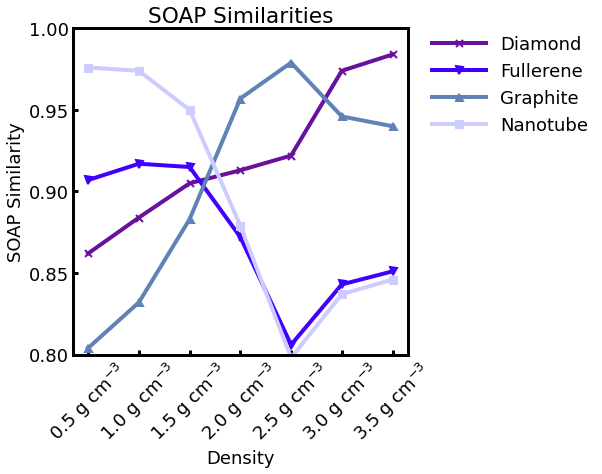

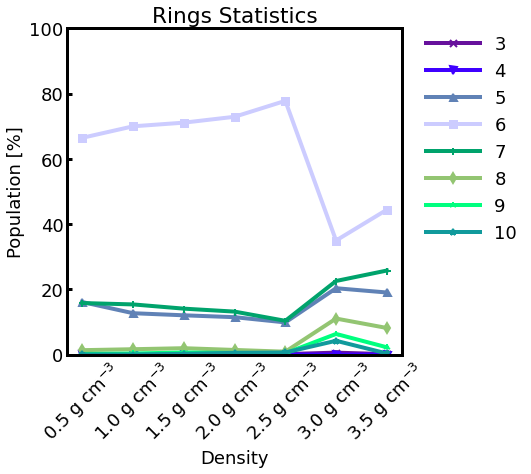

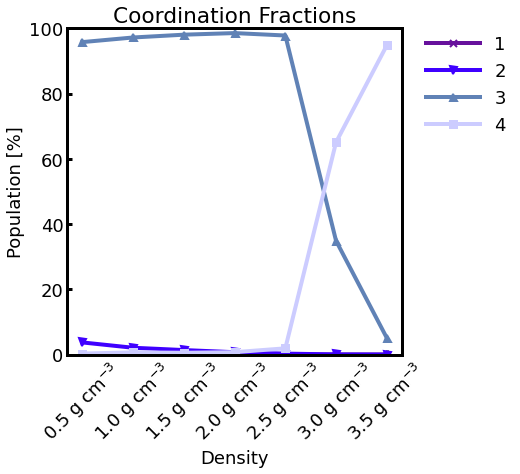

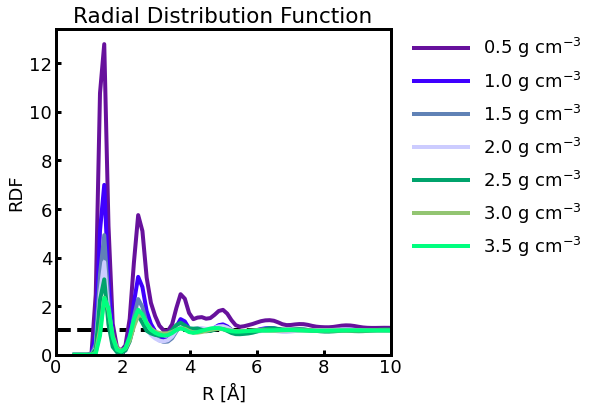

In [52]:
reader = Data_Reader_Plotter(root, filenames, names)

reader.read_similarities()
reader.plot_similarities()

reader.read_rings()
reader.plot_rings()

reader.read_coord_fractions()
reader.plot_coord_fractions()

reader.read_rdfs()
reader.plot_rdfs()